This worksheet shall re-form the information about the suppliers lists customers in a way that the total amount of customers in a year is known. 
Moreover it shall calculate the percentages of SCF programms and undisclosed SCF pograms in a suppliers value chain on a yearly basis between 2017 and 2021

Author: Simon Kirschberger

# Data Preperation

In [302]:
#import relevant libraries
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import numpy
from matplotlib.pyplot import figure
from numpy import log as ln
import seaborn as sns
import math

In [303]:
#import the raw data gathered with EIKON Excel plug-in
df_vchains= pd.read_excel(r"C:\Users\Simon\Downloads\customerdatacopy.xlsx")

In [304]:
#inspect initital data
df_vchains.head(3)

,ID_Supplier,Status,ID_Supplier2,Supplier_Name,ID_Supplier3,Date,ID_Supplier4,ID_Out,ID_Out2,Customer_name,SCF,Disclosure
0,5029074200,Customer,5029074200,Traackr Inc,5029074200,2018-04-26 00:00:00,5029074200,4295903091,4295903091,Coca-Cola Co,1,1
1,5029074200,Customer,5029074200,Traackr Inc,5029074200,2018-04-26 00:00:00,5029074200,4295907168,4295907168,Microsoft Corp,1,0
2,4295914493,Customer,4295914493,Pantry Inc,4295914493,2013-06-18 00:00:00,4295914493,4295903091,4295903091,Coca-Cola Co,1,1


In [305]:
#create a dataframe where only the customers and not the suppliers of the suppliers are included
df_customers = df_vchains[df_vchains['Status']=="Customer"]

In [307]:
#inspect the resulting dataframe
df_customers.head()

,ID_Supplier,Status,ID_Supplier2,Supplier_Name,ID_Supplier3,Date,ID_Supplier4,ID_Out,ID_Out2,Customer_name,SCF,Disclosure
0,5029074200,Customer,5029074200,Traackr Inc,5029074200,2018-04-26 00:00:00,5029074200,4295903091,4295903091,Coca-Cola Co,1,1
1,5029074200,Customer,5029074200,Traackr Inc,5029074200,2018-04-26 00:00:00,5029074200,4295907168,4295907168,Microsoft Corp,1,0
2,4295914493,Customer,4295914493,Pantry Inc,4295914493,2013-06-18 00:00:00,4295914493,4295903091,4295903091,Coca-Cola Co,1,1
7,4295870666,Customer,4295870666,Frigoglass SA,4295870666,2016-04-01 00:00:00,4295870666,4295903091,4295903091,Coca-Cola Co,1,1
8,4295870666,Customer,4295870666,Frigoglass SA,4295870666,2014-08-07 00:00:00,4295870666,4295884692,4295884692,Heineken NV,1,0


One row represents one new customer for one supplier

In [232]:
#summarize the number of new customers in in one year 
#create a column to count the unique number of new customers in a year, the number with scf programs and the number of disclosed scf programs
sum_df=df_customers.groupby([pd.Grouper(key='Date', freq='A'), 'Supplier_Name']).agg(new_customers=('Customer_name', 'nunique'),
         have_scf=('SCF','sum'),
         disclose_scf=('Disclosure','sum')).reset_index("Date")

In [233]:
#inspect the resulting df
sum_df.head(3)

,Date,new_customers,have_scf,disclose_scf
Supplier_Name,,,,
AF Group Polska Sp z o o,2010-12-31,1,0,0
AGR Drilling Services Pty Ltd,2010-12-31,1,1,0
AM Castle & Co,2010-12-31,1,1,0


One row counts the total new deals for one company in one year (2010-2022) and how many of those have a SCF program and how many of those are disclosed

To know how many customers a supplier had in total in a year we have to add up the new customers of each year until that point in time
e.g. to gaher how many customers a company had in 2013 we have to add up new customers in 2010+2011+2012+2013

In [234]:
#split up the df into one df for each year and rename the columns for easier recognition and avoiding dupicate names when merging
sum_df10= sum_df[sum_df['Date']=="2010-12-31"].rename({'Date':'Date10', 'new_customers':'new_customers10', "have_scf":"have_scf10", "disclose_scf":"disclose_scf10"}, axis=1)
sum_df11= sum_df[sum_df['Date']=="2011-12-31"].rename({'Date':'Date11', 'new_customers':'new_customers11', "have_scf":"have_scf11", "disclose_scf":"disclose_scf11"}, axis=1)
sum_df12= sum_df[sum_df['Date']=="2012-12-31"].rename({'Date':'Date12', 'new_customers':'new_customers12', "have_scf":"have_scf12", "disclose_scf":"disclose_scf12"}, axis=1)
sum_df13= sum_df[sum_df['Date']=="2013-12-31"].rename({'Date':'Date13', 'new_customers':'new_customers13', "have_scf":"have_scf13", "disclose_scf":"disclose_scf13"}, axis=1)
sum_df14= sum_df[sum_df['Date']=="2014-12-31"].rename({'Date':'Date14', 'new_customers':'new_customers14', "have_scf":"have_scf14", "disclose_scf":"disclose_scf14"}, axis=1)
sum_df15= sum_df[sum_df['Date']=="2015-12-31"].rename({'Date':'Date15', 'new_customers':'new_customers15', "have_scf":"have_scf15", "disclose_scf":"disclose_scf15"}, axis=1)
sum_df16= sum_df[sum_df['Date']=="2016-12-31"].rename({'Date':'Date16', 'new_customers':'new_customers16', "have_scf":"have_scf16", "disclose_scf":"disclose_scf16"}, axis=1)
sum_df17= sum_df[sum_df['Date']=="2017-12-31"].rename({'Date':'Date17', 'new_customers':'new_customers17', "have_scf":"have_scf17", "disclose_scf":"disclose_scf17"}, axis=1)
sum_df18= sum_df[sum_df['Date']=="2018-12-31"].rename({'Date':'Date18', 'new_customers':'new_customers18', "have_scf":"have_scf18", "disclose_scf":"disclose_scf18"}, axis=1)
sum_df19= sum_df[sum_df['Date']=="2019-12-31"].rename({'Date':'Date19', 'new_customers':'new_customers19', "have_scf":"have_scf19", "disclose_scf":"disclose_scf19"}, axis=1)
sum_df20= sum_df[sum_df['Date']=="2020-12-31"].rename({'Date':'Date20', 'new_customers':'new_customers20', "have_scf":"have_scf20", "disclose_scf":"disclose_scf20"}, axis=1)
sum_df21= sum_df[sum_df['Date']=="2021-12-31"].rename({'Date':'Date21', 'new_customers':'new_customers21', "have_scf":"have_scf21", "disclose_scf":"disclose_scf21"}, axis=1)
sum_df22= sum_df[sum_df['Date']=="2022-12-31"].rename({'Date':'Date22', 'new_customers':'new_customers22', "have_scf":"have_scf22", "disclose_scf":"disclose_scf22"}, axis=1)


# Dataframe for 2017

In [235]:
#Since the thesis wants to analyze the timeframe from 2017-2021 we need to calculate the total number of customers for the first year (2017) 
#by adding up all the new customers of the years 2010 to 2017. First step: cretae a list of relevant dataframes
dfs10_17 = (sum_df10,sum_df11,sum_df12,sum_df13,sum_df14,sum_df15,sum_df16,sum_df17)

In [236]:
#merge the dfs for 2010 to 2017
#we use an outer merge to not drop any company who is not represented in every year
#we fill N/A errors with 0 so the adding up later works without issues
sum_df10_17 = reduce(lambda  left,right: pd.merge(left,right,on=['Supplier_Name'],
                                            how='outer'), dfs10_17).fillna(0)

In [237]:
#inspect the resulting df
sum_df10_17.head(3)

,Date10,new_customers10,have_scf10,disclose_scf10,Date11,new_customers11,have_scf11,disclose_scf11,Date12,new_customers12,...,have_scf15,disclose_scf15,Date16,new_customers16,have_scf16,disclose_scf16,Date17,new_customers17,have_scf17,disclose_scf17
Supplier_Name,,,,,,,,,,,,,,,,,,,,,
AF Group Polska Sp z o o,2010-12-31 00:00:00,1.0,0.0,0.0,0,0.0,0.0,0.0,2012-12-31 00:00:00,1.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0
AGR Drilling Services Pty Ltd,2010-12-31 00:00:00,1.0,1.0,0.0,0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0
AM Castle & Co,2010-12-31 00:00:00,1.0,1.0,0.0,0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0


We have a realistic number of companies so none have been dropped in the merge (outer). We have the company as an index and a set of 4 coulmns for each year.
In the next steps we want to add the information per year together and then drop the columns for each individual year

In [238]:
#add up the new customers
sum_df10_17['new_customers10_17'] = sum_df10_17['new_customers10'] +sum_df10_17['new_customers11']+sum_df10_17['new_customers12']+sum_df10_17['new_customers13']+sum_df10_17['new_customers14']+sum_df10_17['new_customers15']+sum_df10_17['new_customers16']+sum_df10_17['new_customers17']

In [239]:
#add up the number of which have a SCF program
sum_df10_17['have_scf10_17'] = sum_df10_17['have_scf10'] +sum_df10_17['have_scf11'] +sum_df10_17['have_scf12'] +sum_df10_17['have_scf13'] +sum_df10_17['have_scf14'] +sum_df10_17['have_scf15'] +sum_df10_17['have_scf16'] +sum_df10_17['have_scf17'] 

In [240]:
#add up the number of which disclose the SCF program
sum_df10_17['disclose_scf10_17'] = sum_df10_17['disclose_scf10'] +sum_df10_17['disclose_scf11']+sum_df10_17['disclose_scf12']+sum_df10_17['disclose_scf13']+sum_df10_17['disclose_scf14']+sum_df10_17['disclose_scf15']+sum_df10_17['disclose_scf16']+sum_df10_17['disclose_scf17']

In [241]:
#export the rusulting df to excel to conduct a proper chech whether the adding up worked as intended - no problems
#sum_df10_17.to_excel(r"C:\Users\Simon\Downloads\sumdf1017.xlsx")

In [242]:
#drop new customer column
sum_df10_17.drop(['new_customers10',
                 'new_customers11',
                 'new_customers12',
                 'new_customers13',
                 'new_customers14',
                 'new_customers15',
                 'new_customers16',
                 'new_customers17'],
                 axis=1, inplace=True)

In [243]:
#drop Date column
sum_df10_17.drop(['Date10',
                 'Date11',
                 'Date12',
                 'Date13',
                 'Date14',
                 'Date15',
                 'Date16',
                 'Date17'],
                 axis=1, inplace=True)

In [244]:
#Drop have scf column
sum_df10_17.drop(['have_scf10',
                 'have_scf11',
                 'have_scf12',
                 'have_scf13',
                 'have_scf14',
                 'have_scf15',
                 'have_scf16',
                 'have_scf17'],
                 axis=1, inplace=True)

In [245]:
#drop disclosure column
sum_df10_17.drop(['disclose_scf10',
                 'disclose_scf11',
                 'disclose_scf12',
                 'disclose_scf13',
                 'disclose_scf14',
                 'disclose_scf15',
                 'disclose_scf16',
                 'disclose_scf17'],
                 axis=1, inplace=True)

In [246]:
#sum_df10_17.to_excel(r"C:\Users\Simon\Downloads\sumdf1017_1.xlsx")

In [247]:
#calculate the percentages of how many of the supliers customers have an SCF program and how many do not disclose it
sum_df10_17['%_have_scf10_17'] = sum_df10_17['disclose_scf10_17']/sum_df10_17['new_customers10_17']
sum_df10_17['%_have_undisclosed_scf10_17'] = (sum_df10_17['have_scf10_17']-sum_df10_17['disclose_scf10_17'])/sum_df10_17['new_customers10_17']

In [248]:
#add a year marker
sum_df10_17['Year10_17'] = 2017

In [249]:
sum_df10_17.head(3)

,new_customers10_17,have_scf10_17,disclose_scf10_17,%_have_scf10_17,%_have_undisclosed_scf10_17,Year10_17
Supplier_Name,,,,,,
AF Group Polska Sp z o o,2.0,1.0,0.0,0.0,0.5,2017
AGR Drilling Services Pty Ltd,1.0,1.0,0.0,0.0,1.0,2017
AM Castle & Co,1.0,1.0,0.0,0.0,1.0,2017


# Dataframe for 2018

In [250]:
#merge the two df relevant for this date range
sum_df17_18=sum_df10_17.merge( sum_df18, right_index=True, left_index=True, how='outer').fillna(0)

In [251]:
#add up the values
sum_df17_18['new_customers17_18'] = sum_df17_18['new_customers10_17'] +sum_df17_18['new_customers18']
sum_df17_18['have_scf17_18'] = sum_df17_18['have_scf10_17'] +sum_df17_18['have_scf18'] 
sum_df17_18['disclose_scf17_18'] = sum_df17_18['disclose_scf10_17'] +sum_df17_18['disclose_scf18'] 

In [252]:
#calculate the percentages of how many of the supliers customers have an SCF program and how many do not disclose it
sum_df17_18['%_have_scf17_18'] = sum_df17_18['disclose_scf17_18']/sum_df17_18['new_customers17_18']
sum_df17_18['%_have_undisclosed_scf17_18'] = (sum_df17_18['have_scf17_18']-sum_df17_18['disclose_scf17_18'])/sum_df17_18['new_customers17_18']

In [253]:
#add a year marker
sum_df17_18['Year17_18'] = 2018

In [254]:
#drop columns not needed anymore
sum_df17_18.drop(['new_customers10_17','Year10_17', 'have_scf10_17', 'disclose_scf10_17', 'Date18', 'new_customers18', 'have_scf18', 'disclose_scf18', '%_have_scf10_17', '%_have_undisclosed_scf10_17'], axis=1, inplace=True)

In [255]:
#sum_df17_18.to_excel(r"C:\Users\Simon\Downloads\sumdf17_18.xlsx")

# Dataframe for 2019

In [256]:
#merge the two df relevant for this date range
sum_df18_19=sum_df17_18.merge(sum_df19, right_index=True, left_index=True, how='outer').fillna(0)

In [257]:
#add up the values
sum_df18_19['new_customers18_19'] = sum_df18_19['new_customers17_18'] +sum_df18_19['new_customers19']
sum_df18_19['have_scf18_19'] = sum_df18_19['have_scf17_18'] +sum_df18_19['have_scf19'] 
sum_df18_19['disclose_scf18_19'] = sum_df18_19['disclose_scf17_18'] +sum_df18_19['disclose_scf19'] 

In [258]:
#calculate the percentages of how many of the supliers customers have an SCF program and how many do not disclose it
sum_df18_19['%_have_scf18_19'] = sum_df18_19['disclose_scf18_19']/sum_df18_19['new_customers18_19']
sum_df18_19['%_have_undisclosed_scf18_19'] = (sum_df18_19['have_scf18_19']-sum_df18_19['disclose_scf18_19'])/sum_df18_19['new_customers18_19']

In [259]:
#add a year marker
sum_df18_19['Year18_19'] = 2019

In [260]:
#drop columns not needed anymore
sum_df18_19.drop(['new_customers17_18','Year17_18', 'have_scf17_18', 'disclose_scf17_18', 'Date19', 'new_customers19', 'have_scf19', 'disclose_scf19', '%_have_scf17_18', '%_have_undisclosed_scf17_18'], axis=1, inplace=True)

In [261]:
sum_df18_19.head(3)

,new_customers18_19,have_scf18_19,disclose_scf18_19,%_have_scf18_19,%_have_undisclosed_scf18_19,Year18_19
Supplier_Name,,,,,,
2242749 Ontario Ltd,1.0,1.0,0.0,0.0,1.0,2019
23andMe Inc,1.0,1.0,0.0,0.0,1.0,2019
2Crsi SA,1.0,1.0,0.0,0.0,1.0,2019


# Dataframe for 2020

In [262]:
#merge the two df relevant for this date range
sum_df19_20=pd.merge(sum_df18_19, sum_df20, right_index=True, left_index=True, how='outer').fillna(0)

In [263]:
#add up the values
sum_df19_20['new_customers19_20'] = sum_df19_20['new_customers18_19'] +sum_df19_20['new_customers20']
sum_df19_20['have_scf19_20'] = sum_df19_20['have_scf18_19'] +sum_df19_20['have_scf20'] 
sum_df19_20['disclose_scf19_20'] = sum_df19_20['disclose_scf18_19'] +sum_df19_20['disclose_scf20'] 

In [264]:
#calculate the percentages of how many of the supliers customers have an SCF program and how many do not disclose it
sum_df19_20['%_have_scf19_20'] = sum_df19_20['disclose_scf19_20']/sum_df19_20['new_customers19_20']
sum_df19_20['%_have_undisclosed_scf19_20'] = (sum_df19_20['have_scf19_20']-sum_df19_20['disclose_scf19_20'])/sum_df19_20['new_customers19_20']

In [265]:
#add a year marker
sum_df19_20['Year19_20'] = 2020

In [266]:
#drop columns not needed anymore
sum_df19_20.drop(['new_customers18_19', 'Year18_19','have_scf18_19', 'disclose_scf18_19', 'Date20', 'new_customers20', 'have_scf20', 'disclose_scf20','%_have_scf18_19', '%_have_undisclosed_scf18_19'], axis=1, inplace=True)

In [267]:
sum_df19_20.head(3)

,new_customers19_20,have_scf19_20,disclose_scf19_20,%_have_scf19_20,%_have_undisclosed_scf19_20,Year19_20
Supplier_Name,,,,,,
2242749 Ontario Ltd,1.0,1.0,0.0,0.0,1.0,2020
23andMe Inc,1.0,1.0,0.0,0.0,1.0,2020
2Crsi SA,2.0,1.0,0.0,0.0,0.5,2020


# Dataframe for 2021

In [268]:
#merge the two df relevant for this date range
sum_df20_21=pd.merge(sum_df19_20, sum_df21, right_index=True, left_index=True, how='outer').fillna(0)

In [269]:
#add up the values
sum_df20_21['new_customers20_21'] = sum_df20_21['new_customers19_20'] +sum_df20_21['new_customers21']
sum_df20_21['have_scf20_21'] = sum_df20_21['have_scf19_20'] +sum_df20_21['have_scf21'] 
sum_df20_21['disclose_scf20_21'] = sum_df20_21['disclose_scf19_20'] +sum_df20_21['disclose_scf21'] 

In [270]:
#calculate the percentages of how many of the supliers customers have an SCF program and how many do not disclose it
sum_df20_21['%_have_scf20_21'] = sum_df20_21['disclose_scf20_21']/sum_df20_21['new_customers20_21']
sum_df20_21['%_have_undisclosed_scf20_21'] = (sum_df20_21['have_scf20_21']-sum_df20_21['disclose_scf20_21'])/sum_df20_21['new_customers20_21']

In [271]:
#add a year marker
sum_df20_21['Year20_21'] = 2021

In [272]:
#drop columns not needed anymore
sum_df20_21.drop(['new_customers19_20', 'Year19_20','have_scf19_20', 'disclose_scf19_20', 'Date21', 'new_customers21', 'have_scf21', 'disclose_scf21','%_have_scf19_20', '%_have_undisclosed_scf19_20'], axis=1, inplace=True)

In [273]:
sum_df20_21.head(3)

,new_customers20_21,have_scf20_21,disclose_scf20_21,%_have_scf20_21,%_have_undisclosed_scf20_21,Year20_21
Supplier_Name,,,,,,
2242749 Ontario Ltd,1.0,1.0,0.0,0.0,1.00,2021
23andMe Inc,1.0,1.0,0.0,0.0,1.00,2021
2Crsi SA,4.0,1.0,0.0,0.0,0.25,2021


Since this study only looks at 2017-2021 the new customers in 2022 are disregarded as all customers until 31-12-2021 have benn covered

# Assemble Results

The individual df should be appended below each other and sorted so that each row depicts one company for one year.

In [274]:
#Change back to uniform names to append the dataframes
df17= sum_df10_17.rename({'new_customers10_17':'new_customers', 'have_scf10_17':'have_scf','disclose_scf10_17':'disclose_scf','%_have_scf10_17':'%_have_scf','%_have_undisclosed_scf10_17':'%_have_undisclosed_scf','Year10_17':'Year'}, axis=1).reset_index(level=0)
df18= sum_df17_18.rename({'new_customers17_18':'new_customers', 'have_scf17_18':'have_scf','disclose_scf17_18':'disclose_scf','%_have_scf17_18':'%_have_scf','%_have_undisclosed_scf17_18':'%_have_undisclosed_scf','Year17_18':'Year'}, axis=1).reset_index(level=0)
df19= sum_df18_19.rename({'new_customers18_19':'new_customers', 'have_scf18_19':'have_scf','disclose_scf18_19':'disclose_scf','%_have_scf18_19':'%_have_scf','%_have_undisclosed_scf18_19':'%_have_undisclosed_scf','Year18_19':'Year'}, axis=1).reset_index(level=0)
df20= sum_df19_20.rename({'new_customers19_20':'new_customers', 'have_scf19_20':'have_scf','disclose_scf19_20':'disclose_scf','%_have_scf19_20':'%_have_scf','%_have_undisclosed_scf19_20':'%_have_undisclosed_scf','Year19_20':'Year'}, axis=1).reset_index(level=0)
df21= sum_df20_21.rename({'new_customers20_21':'new_customers', 'have_scf20_21':'have_scf','disclose_scf20_21':'disclose_scf','%_have_scf20_21':'%_have_scf','%_have_undisclosed_scf20_21':'%_have_undisclosed_scf','Year20_21':'Year'}, axis=1).reset_index(level=0)

In [275]:
#define relevant dfs
frames=(df17,df18,df19,df20,df21)

In [276]:
#append frames to each other
df_result = pd.concat(frames, ignore_index=True).sort_values(by=['Supplier_Name', 'Year'])

In [277]:
#inspect result
#df_result.to_excel(r"C:\Users\Simon\Downloads\df_result.xlsx")


In [278]:
df_result.head(3)

,Supplier_Name,new_customers,have_scf,disclose_scf,%_have_scf,%_have_undisclosed_scf,Year
289,2242749 Ontario Ltd,1.0,1.0,0.0,0.0,1.0,2017
3609,2242749 Ontario Ltd,1.0,1.0,0.0,0.0,1.0,2018
7806,2242749 Ontario Ltd,1.0,1.0,0.0,0.0,1.0,2019


In [279]:
df_supplier_list = df_result.drop(['new_customers', 'have_scf', 'disclose_scf', '%_have_scf', '%_have_undisclosed_scf'], axis=1, inplace=False)

At this stage we re-export the suppliers to excel so we can add metadeta (size, location, industry) and the Z-Score using the Eikon Excel add-in

In [394]:
#df_result.to_excel(r"C:\Users\Simon\Downloads\df_result1.xlsx")

In [395]:
df_altman_temp= pd.read_excel(r"C:\Users\Simon\Downloads\results_altman.xlsx")

In [396]:
#The finacial information for the altman score is only available for oughly 50% of suppliers. Unfortunately those for which it is not available have to be excluded
df_altman=df_altman_temp[df_altman_temp['Z_is_error']==0]

In [397]:
df_altman['Industry'].value_counts()

Software & IT Services                              1864
Machinery, Tools, Heavy Vehicles, Trains & Ships     693
Semiconductors & Semiconductor Equipment             595
Automobiles & Auto Parts                             570
Biotechnology & Medical Research                     568
Oil & Gas Related Equipment and Services             454
Pharmaceuticals                                      418
Communications & Networking                          413
Telecommunications Services                          406
Oil & Gas                                            397
Aerospace & Defense                                  387
Professional & Commercial Services                   382
Metals & Mining                                      371
Food & Tobacco                                       348
Computers, Phones & Household Electronics            333
Chemicals                                            326
Media & Publishing                                   301
Healthcare Equipment & Supplies

In [387]:
SCF_Lower_Bound = 0.01
SCF_Upper_Bound = 1
have_scf_LB = 1
have_scf_UB = 1000000
Altman_Lower_Bound = -30
Altman_Upper_Bound = 30
Undisclosed_Lower_Bound = 1
Undisclosed_Upper_Bound = 10000
perc_Undisclosed_Lower_Bound = 0.0001
perc_Undisclosed_Upper_Bound = 10000
Country =  ['Canada', 'France', 'Germany', 'China',
       'Croatia', 'South Africa', 'United Kingdom', 'Japan', 'Taiwan',
       'Denmark', 'Cyprus', 'Netherlands', 'Austria', 'Switzerland',
       'Spain', 'Belgium', 'Sweden', 'Ireland; Republic of',
       'New Zealand', 'India', 'Peru', 'Israel', 'Russia', 'Tunisia',
       'Norway', 'Mexico', 'Bermuda', 'Australia', 'Brazil',
       'United Arab Emirates', 'Luxembourg', 'Jordan', 'Uruguay',
       'Poland', 'Singapore', 'Malaysia', 'Finland', 'Hong Kong',
       'Cayman Islands', 'Mauritius', 'Italy', 'Turkey', 'Chile',
       'Panama', 'Monaco', 'Korea; Republic (S. Korea)', 'Greece',
       'Sri Lanka', 'Vietnam', 'Colombia', 'Saudi Arabia', 'Indonesia',
       'Philippines', 'Jersey', 'Romania', 'Thailand', 'Pakistan',
       'Hungary', 'Egypt', 'Malta', 'Papua New Guinea', 'Qatar',
       'Kazakhstan', 'Nigeria', 'Kenya', 'Bahamas', 'Ukraine',
       'Argentina']
manufacturing = ['Aerospace & Defense',
       'Computers, Phones & Household Electronics',
       'Machinery, Tools, Heavy Vehicles, Trains & Ships',
            'Construction & Engineering',
       'Chemicals', 
            'Oil & Gas Related Equipment and Services',
       'Metals & Mining', 
            'Pharmaceuticals',
       'Semiconductors & Semiconductor Equipment', 
            'Oil & Gas',
       'Automobiles & Auto Parts', 
            'Containers & Packaging',
       'Electric Utilities & IPPs',
       'Office Equipment', 
            'Food & Tobacco', 
            'Renewable Energy',
       'Healthcare Equipment & Supplies', 
            'Electronic Equipment & Parts',
       'Beverages',
       'Personal & Household Products & Services',
            'Multiline Utilities', 
            'Leisure Products',
       'Consumer Goods Conglomerates',
       'Homebuilding & Construction Supplies',
       'Household Goods']
non_manufacturing=['Communications & Networking',
       'Software & IT Services', 'Freight & Logistics Services',
       'Telecommunications Services',
       'Hotels & Entertainment Services', 
            'Diversified Retail',
       'Professional & Commercial Services', 
            'Biotechnology & Medical Research',
       'Specialty Retailers', 
            'Healthcare Providers & Services',
       'Financial Technology (Fintech) & Infrastructure', 
            'Media & Publishing',
       'Passenger Transportation Services',
       'Food & Drug Retailing',
       'Diversified Industrial Goods Wholesale',
       'Transport Infrastructure', 
            'Real Estate Operations']

In [388]:
df_altman = df_altman[df_altman['%_have_scf'].between(SCF_Lower_Bound, SCF_Upper_Bound)]
df_altman = df_altman[df_altman['have_scf'].between(have_scf_LB, have_scf_UB)]
df_altman = df_altman[df_altman['%_have_undisclosed_scf'].between(perc_Undisclosed_Lower_Bound, perc_Undisclosed_Upper_Bound)]
df_altman = df_altman[df_altman['disclose_scf'].between(Undisclosed_Lower_Bound, Undisclosed_Upper_Bound)]
df_altman = df_altman[df_altman['Altman_Z'].between(Altman_Lower_Bound, Altman_Upper_Bound)]
#df_altman = df_altman[df_altman['Country'].isin(Country)]
#df_altman = df_altman[df_altman['Industry'].isin(non_manufacturing)]

In [389]:
df_altman['ln_%_have_scf'] = ln(df_altman['%_have_scf'])
df_altman['ln_have_scf'] = ln(df_altman['have_scf'])
#df_altman['ln_disclose_scf'] = ln(df_altman['disclose_scf'])
df_altman['ln_%_have_undisclosed_scf'] = ln(df_altman['%_have_undisclosed_scf'])
df_altman['ln_disclosure'] = ln((df_altman['disclose_scf']/df_altman['have_scf']))


In [390]:
df_altman

,Unnamed: 0,Supplier_Name,new_customers,have_scf,disclose_scf,%_have_scf,%_have_undisclosed_scf,Year,Year_Eikon_Helper,Supplier_ID,Altman_Z,Z_is_error,Country,Industry,ln_%_have_scf,ln_have_scf,ln_%_have_undisclosed_scf,ln_disclosure
95,17225,ADVA Optical Networking SE,19,2,1,0.105263,0.052632,2021,Sdate=2021-12-31,5037659154,2.881409,0,Germany,Communications & Networking,-2.251292,0.693147,-2.944439,-0.693147
171,7841,AP Moeller - Maersk A/S,8,3,1,0.375000,0.250000,2019,Sdate=2019-12-31,4295866034,3.558728,0,Denmark,Freight & Logistics Services,-0.980829,1.098612,-1.386294,-1.098612
172,12427,AP Moeller - Maersk A/S,8,3,1,0.375000,0.250000,2020,Sdate=2020-12-31,4295866034,3.026803,0,Denmark,Freight & Logistics Services,-0.980829,1.098612,-1.386294,-1.098612
173,17241,AP Moeller - Maersk A/S,12,4,1,0.333333,0.250000,2021,Sdate=2021-12-31,4295866034,4.051963,0,Denmark,Freight & Logistics Services,-1.098612,1.386294,-1.386294,-1.386294
259,3654,AVEVA Group PLC,7,3,1,0.428571,0.285714,2018,Sdate=2018-12-31,4295895969,9.592236,0,United Kingdom,Software & IT Services,-0.847298,1.098612,-1.252763,-1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22095,858,ZTE Corp,25,3,1,0.120000,0.080000,2017,Sdate=2017-12-31,4295865240,1.888879,0,China,Communications & Networking,-2.120264,1.098612,-2.525729,-1.098612
22096,7753,ZTE Corp,27,4,1,0.148148,0.111111,2018,Sdate=2018-12-31,4295865240,3.110976,0,China,Communications & Networking,-1.909543,1.386294,-2.197225,-1.386294
22097,12332,ZTE Corp,36,7,2,0.194444,0.138889,2019,Sdate=2019-12-31,4295865240,1.394532,0,China,Communications & Networking,-1.637609,1.945910,-1.974081,-1.252763
22098,17138,ZTE Corp,38,7,2,0.184211,0.131579,2020,Sdate=2020-12-31,4295865240,2.845611,0,China,Communications & Networking,-1.691676,1.945910,-2.028148,-1.252763


In [391]:
#Download the final df ready for analysis
df_altman.to_excel(r"C:\Users\Simon\Downloads\df_altman_non_manufacturing_nonus.xlsx")

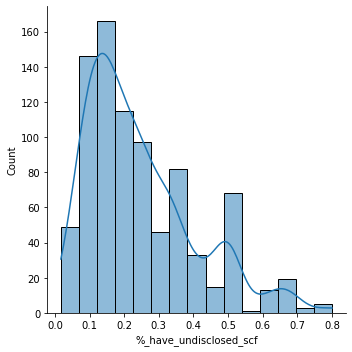

In [337]:
sns.displot(data=df_altman, x="%_have_undisclosed_scf", kde=True, bins=15)


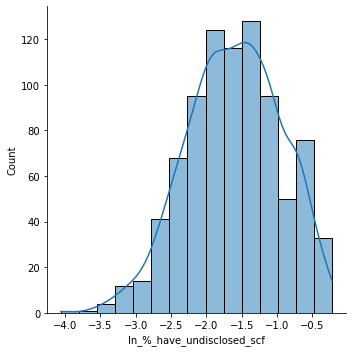

In [338]:
sns.displot(data=df_altman, x="ln_%_have_undisclosed_scf", kde=True, bins=15)

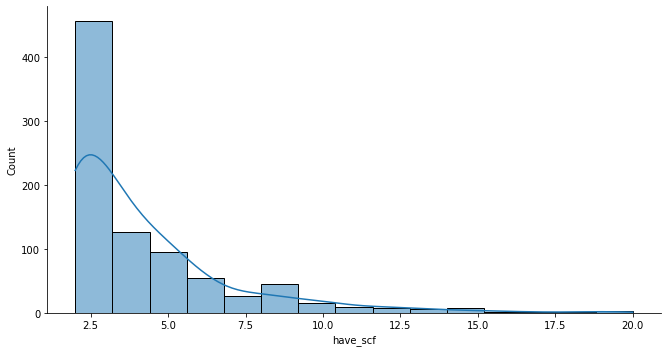

In [339]:
sns.displot(data=df_altman, x="have_scf", kde=True, bins=15, aspect=15/8)


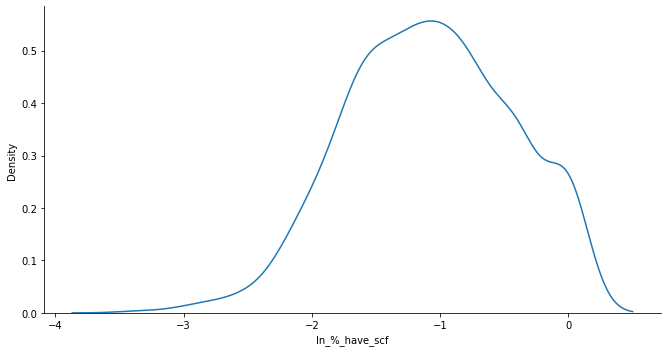

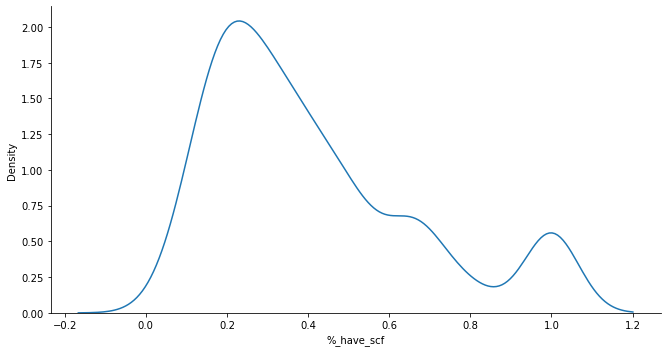

In [340]:
sns.displot(data=df_altman, x="ln_%_have_scf", kind="kde",aspect=15/8)
sns.displot(data=df_altman, x="%_have_scf", kind="kde",aspect=15/8)


In [341]:
df_altman['%_have_scf'].describe()

count    858.000000
mean       0.412116
std        0.258354
min        0.034483
25%        0.214286
50%        0.333333
75%        0.542424
max        1.000000
Name: %_have_scf, dtype: float64